<a href="https://colab.research.google.com/github/BotchaSravani/Job-Market-Insights-Trends-Skills-and-Salaries/blob/main/Skills_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

#**SKILLS COUNT AND ANALYSIS**

In [2]:
#importing libraries

import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
#loading the dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
#Filtering for Data in United States

df_US = df[df['job_country'] == 'United States']

In [5]:
#Exploding the data based on job_skills and grouping it by both job_skills and job_short_title

df_US = df_US.dropna(subset=['job_skills'])
df_skills = df_US.explode('job_skills')
df_skills = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name = 'skill_count')
df_skills = df_skills.sort_values(by= 'skill_count', ascending=False)

In [6]:
#Getting the top 3 results from job_title_short

job_titles = df_skills['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

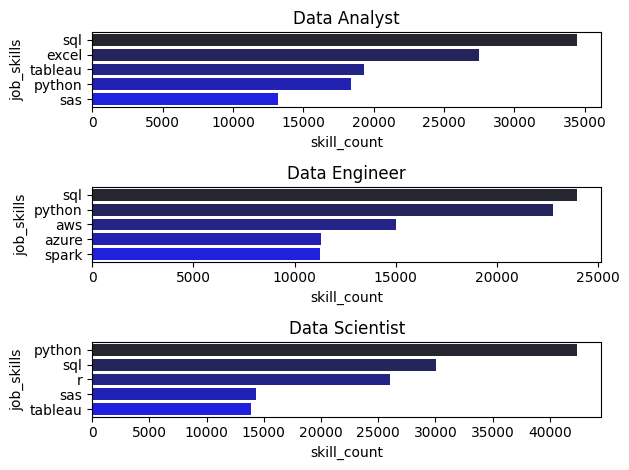

In [7]:
#Plotting wrt Count

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
  df_plot = df_skills[df_skills['job_title_short'] == job_title].head(5)
  sns.barplot(data = df_plot, x = 'skill_count', y = 'job_skills', ax = ax[i], hue = 'job_skills', palette = 'dark:blue')
  ax[i].set_title(job_title)

fig.tight_layout()

In [8]:
#Total count of job postings for each job
df_job_total_count = df_US['job_title_short'].value_counts().reset_index(name = 'total_count')
df_job_total_count

,job_title_short,total_count
0,Data Analyst,57391
1,Data Scientist,51621
2,Data Engineer,33306
3,Senior Data Scientist,11622
4,Senior Data Analyst,10428
5,Senior Data Engineer,8951
6,Business Analyst,6178
7,Software Engineer,1525
8,Machine Learning Engineer,818
9,Cloud Engineer,327


In [11]:
#Merging two Data Frames df_skills and df_job_total_count (joins)

df_merged = pd.merge(df_skills, df_job_total_count, on = 'job_title_short', how = 'left')
df_merged['skill_percentage'] = (df_merged['skill_count']/df_merged['total_count']) * 100
df_merged

,job_skills,job_title_short,skill_count,total_count,skill_percentage
0,python,Data Scientist,42379,51621,82.096434
1,sql,Data Analyst,34452,57391,60.030318
2,sql,Data Scientist,30034,51621,58.181748
3,excel,Data Analyst,27519,57391,47.950027
4,r,Data Scientist,26022,51621,50.409717
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,6178,0.016186
1866,arch,Business Analyst,1,6178,0.016186
1867,asana,Machine Learning Engineer,1,818,0.122249
1868,no-sql,Machine Learning Engineer,1,818,0.122249


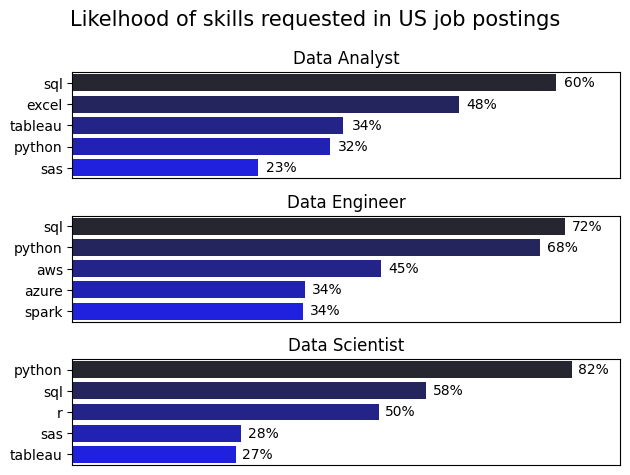

In [44]:
#Plotting wrt percentages

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
  df_perc_plot = df_merged[df_merged['job_title_short'] == job_title].head(5)
  sns.barplot(data = df_perc_plot, x = 'skill_percentage', y = 'job_skills', ax = ax[i], hue = 'job_skills', palette = 'dark:blue')
  ax[i].set_title(job_title)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')

  #Adding the percentages as text beside the bars
  for n, v in enumerate(df_perc_plot['skill_percentage']):
    ax[i].text(v+1, n, f'{v:.0f}%', va='center')

  ax[0].set_xlim(0, 68)
  ax[1].set_xlim(0, 80)
  ax[2].set_xlim(0, 90)

  if i != len(job_title) - 1:
    ax[i].set_xticks([])

fig.suptitle('Likelhood of skills requested in US job postings', fontsize = 15)
fig.tight_layout()